<a href="https://colab.research.google.com/github/yonathanarbel/AI-LAW/blob/main/Class_2_AI_%26_The_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AI and the Law: Class 2**

---



Our goals today is to learn coding by doing. We will learn the minimal amount of coding necessary to tinker with the code below and acheive our goals. You are not expected to understand the logic of much of the code below. That's fine, partial understanding would be more than enough. We do encourage you to be curious and brave. Feel free to change anything and see what happens.


```
# This is formatted as code
```



Some coding fundamentals, cheat sheet:
Comments:

    #: A comment, ignored by Python.

Variables and Data Types:

    a = 5: Assigns value 5 to variable 'a'.
    "text": String, or text data.
    [1, 2, 3]: List of values.

Control Structures:

    if, else: Conditional statements.
    for, while: Looping structures.

Functions and Methods:

    def function_name(): Defines a function.

Importing Modules:

    import module_name: Imports a module.

Operators:

    +, -, *, /: Arithmetic operators.
    ==, !=: Equality/inequality comparison.

Indentation:

    Spaces or tabs: Used to define the scope of blocks.

In [1]:
#Code usually starts with imports
#we just installed a bunch of libraries (=apps)
#we now want to tell Python which ones we are going to use
#For now, nothing much to see here: just click play
import matplotlib.pyplot as plt
import gc
import nltk
import numpy as np
import os
import pandas as pd
import plotly.express as px
import seaborn as sns
import spacy
import time
from collections import Counter
from gensim.corpora import Dictionary
from gensim.models import FastText, HdpModel, Word2Vec
from gensim.models.coherencemodel import CoherenceModel
from nltk.corpus import stopwords
from pandas import read_parquet
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.decomposition import LatentDirichletAllocation, NMF, PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
from wordcloud import WordCloud
from zipfile import ZipFile
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import urllib.request
from urllib.request import urlretrieve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import gc
nltk.download('stopwords')

print("Done")

Done


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
#Our first step is to donwload the data
#We saved a copy that we downloaded from Delaware, containing civil and criminal cases
!wget -v -O data.parquet -L https://github.com/yonathanarbel/AI-LAW/raw/4b0fb4c9bfb9d7c134f16d551351328967fd54bf/Class_2_Civil_v_Criminal_and_Federalist_Papers/sample_combined_cases_dataset.parquet

#Before we do anything further, let's mess around with the data.
#Download it to your computer, from the following link:

#https://alabama.box.com/shared/static/gdhuzwh6ipw5acejdv1g7q509lg72h35.csv
#Alternative: https://raw.githubusercontent.com/yonathanarbel/AI-LAW/main/Class%202%20--%20Civil%20v%20Criminal%20and%20Federalist%20Papers/data.csv

--2023-08-25 16:10:03--  https://github.com/yonathanarbel/AI-LAW/raw/4b0fb4c9bfb9d7c134f16d551351328967fd54bf/Class_2_Civil_v_Criminal_and_Federalist_Papers/sample_combined_cases_dataset.parquet
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yonathanarbel/AI-LAW/4b0fb4c9bfb9d7c134f16d551351328967fd54bf/Class_2_Civil_v_Criminal_and_Federalist_Papers/sample_combined_cases_dataset.parquet [following]
--2023-08-25 16:10:03--  https://raw.githubusercontent.com/yonathanarbel/AI-LAW/4b0fb4c9bfb9d7c134f16d551351328967fd54bf/Class_2_Civil_v_Criminal_and_Federalist_Papers/sample_combined_cases_dataset.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
H

In [6]:
#We donwloaded the data file, now we are loading it to memory.

df = pd.read_parquet('data.parquet')

#Now we have a variable called 'df' (short for dataframe) and it is just like an excel sheet, stored in the memory
#It has rows and columns, just like our Excel sheet

In [7]:
#What part of the data we care about?
#Only two columns
X = df['file_content']
y = df['case_type']

#(why is 'y' lowercase here? Just an old convention, don't read anything into it, you can change it)

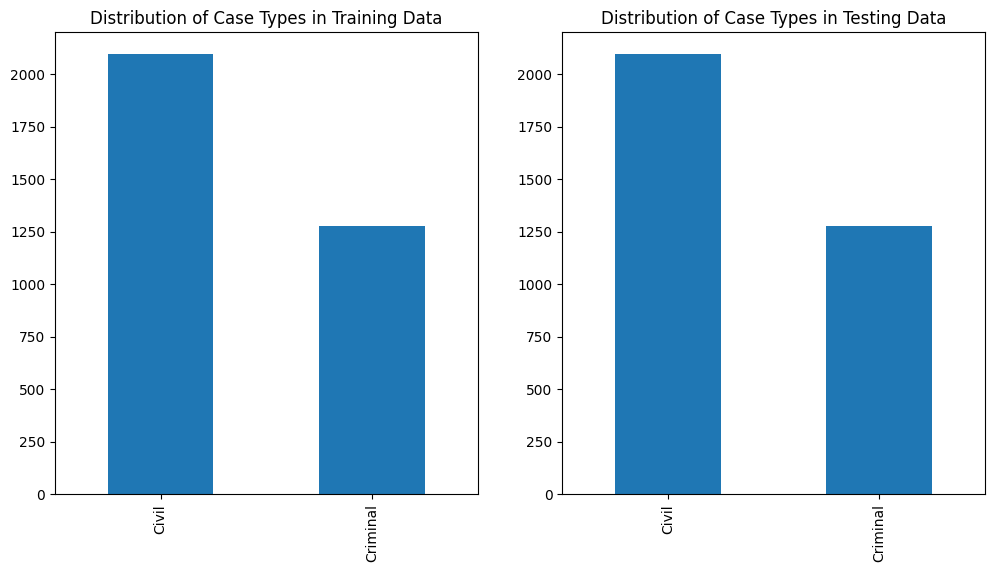

Calculating text lengths...


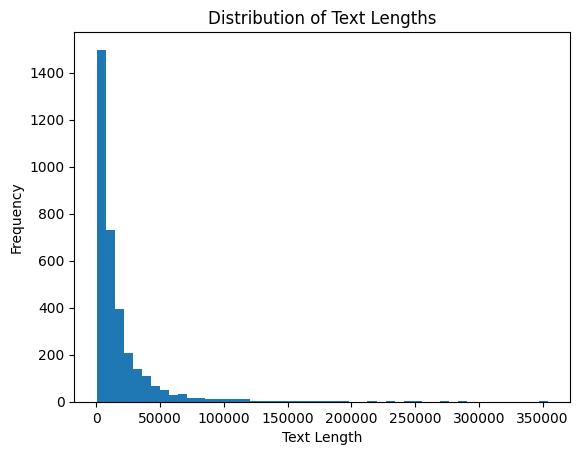

In [8]:
#Our first step with any data is to... check it out
#This is "playing around" mode. Nothing concrete, just checking it
# Plot distribution of case types
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
y.value_counts().plot(kind='bar')
plt.title('Distribution of Case Types in Training Data')
plt.subplot(1, 2, 2)
y.value_counts().plot(kind='bar')
plt.title('Distribution of Case Types in Testing Data')
plt.show()

# Plot distribution of text lengths
print("Calculating text lengths...")
text_lengths = X.str.len()  # Calculate the length of each text in X
plt.hist(text_lengths, bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [9]:
#Let's have some fun. Create a wordcloud:

# Generate the word cloud
start_time = time.time()
text_combined = ' '.join(X)  # Combine all texts into a single string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Time taken to generate the word cloud: {elapsed_time} seconds")

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Combined Dataset')
plt.show()

#Oh no! Our first bug
# Using ChatGPT, can you sleuth what went wrong?

TypeError: ignored

-----
Spoiler
-
-
-
-
-
-
-
-

-
-
-
-
-
--------


Time taken to generate the word cloud: 20.66490077972412 seconds


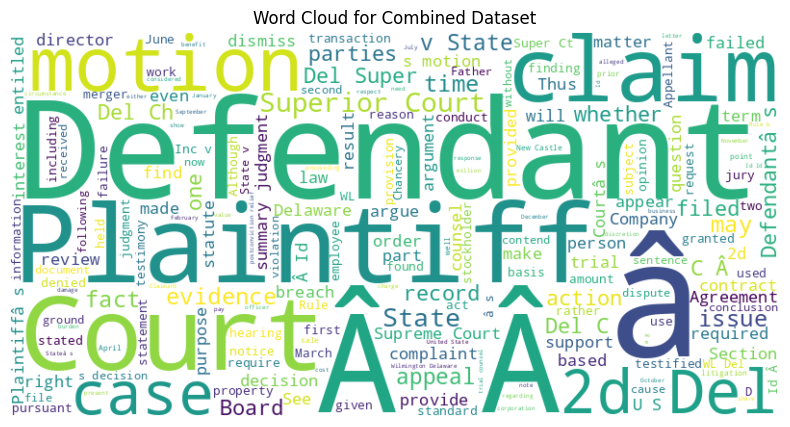

In [10]:
#Let's try again:


df = df[df['file_content'] != 'n/a']
df = df.dropna(subset=['file_content'])

X = df['file_content']
y = df['case_type']
# Generate the word cloud
start_time = time.time()
text_combined = ' '.join(X)  # Combine all texts into a single string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Time taken to generate the word cloud: {elapsed_time} seconds")

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Combined Dataset')
plt.show()

In [ ]:
#That's better, but still not super informative...
#What would make things better?

-----
Spoiler
-
-
-
-
-
-
-
-

-
-
-
-
-
--------


<ipython-input-11-37ea1c0b15a8>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['file_content'] = df['file_content'].str.replace('[âÂ]', '')
Removing stop words: 100%|██████████| 3373/3373 [00:04<00:00, 833.28it/s] 


Time taken to generate the word cloud: 26.735273122787476 seconds


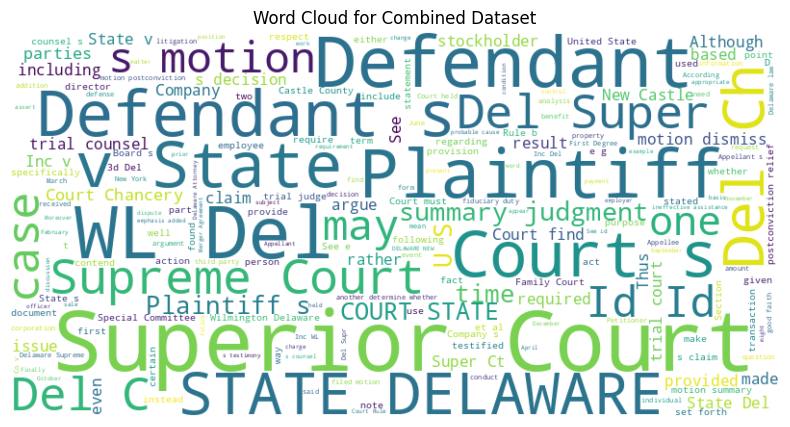

In [11]:
# Download stop words if not already downloaded
# Define a function to remove stop words from text
def remove_stop_words(text):
    if text is None:
        return ""
    stop_words = set(stopwords.words('english'))
    custom_stop_words = ["Â", "Del", "Â§", "A.2d", "'", "Â", "2D Del"]
    stop_words.update([word.lower() for word in custom_stop_words])
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


df['file_content'] = df['file_content'].str.replace('[âÂ]', '')


# Apply the function to the 'file_content' column with tqdm
tqdm.pandas(desc="Removing stop words")
df['file_content'] = df['file_content'].progress_apply(remove_stop_words)
X = df['file_content']

# Generate the word cloud
start_time = time.time()
text_combined = ' '.join(X)  # Combine all texts into a single string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Time taken to generate the word cloud: {elapsed_time} seconds")

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Combined Dataset')
plt.show()

In [12]:
#Let's get the same but with some numbers. Who doesn't like numbers?

# Tokenize the combined_text
words = text_combined.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get the 50 most common words
most_common_words = word_counts.most_common(50)

# Print the 50 most common words
print("50 most common words:", most_common_words)


50 most common words: [('Court', 48212), ('v.', 38825), ('§', 26253), ('(Del.', 25294), ('.', 21215), ('would', 20826), ('Id.', 18061), ('Delaware', 14692), ('also', 14500), (')', 14362), ('WL', 13294), ('motion', 13193), ('State', 12818), ('evidence', 12282), ('Defendant', 11617), ('See', 11165), ('claim', 11005), ('court', 10905), ('Superior', 10584), ('must', 10438), ('trial', 10354), ('may', 9938), ('whether', 9852), ('Del.', 9842), ('filed', 9779), ('Rule', 9753), ('No.', 9746), ('claims', 9112), ('Plaintiff', 8904), ('Mr.', 8896), ('judgment', 8779), ('one', 8673), ('time', 8323), ('could', 8293), ('C.', 8099), ('case', 7821), ('counsel', 7773), ('&', 7723), ('two', 7551), ('Board', 7384), ('parties', 7342), ('law', 7076), ('decision', 6987), ('made', 6858), ('Motion', 6771), ('Ch.', 6680), ('upon', 6549), ('appeal', 6514), ('2', 6509), ('State,', 6389)]


Time taken to generate the word cloud for label Criminal: 5.317047119140625 seconds


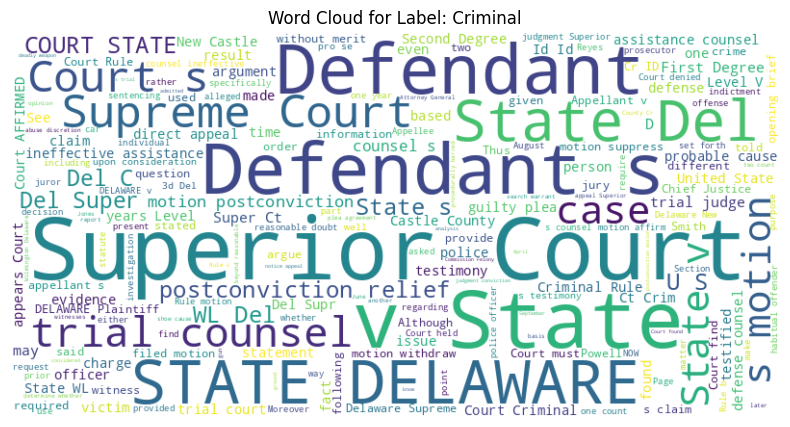

Time taken to generate the word cloud for label Civil: 17.976544857025146 seconds


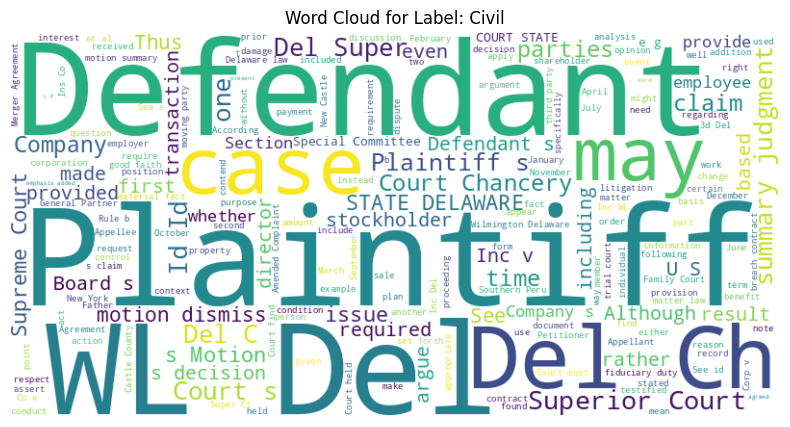

In [13]:
# Get unique labels
unique_labels = y.unique()

# Generate word clouds for each label
for label in unique_labels:
    # Combine the file_content for the specific label, replacing None with empty strings
    label_text = ' '.join([str(x) if x is not None else "" for x in X[y == label]])

    # Generate the word cloud
    start_time = time.time()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(label_text)
    end_time = time.time()

    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f"Time taken to generate the word cloud for label {label}: {elapsed_time} seconds")

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label: {label}')
    plt.show()

    # Access the word frequencies
    word_frequencies = wordcloud.words_

    # Optional: this will mess the output a bit
    #Print the word frequencies
    #for word, freq in word_frequencies.items():
    #    print(f"{word}: {freq}")


In [14]:
#So let's get this in text format: which are the top terms?
#Change the number so we'll get more than 4

nterms = 4

# Group the filtered dataset by case_type
grouped = df.groupby('case_type')

# Function to get the top nterms
def get_top_terms(texts):
    tfidf_vectorizer_category = TfidfVectorizer()
    tfidf_matrix_category = tfidf_vectorizer_category.fit_transform(texts)
    feature_names = tfidf_vectorizer_category.get_feature_names_out()
    summed_tfidf = tfidf_matrix_category.sum(axis=0).A1
    top_indices = np.argsort(summed_tfidf)[-nterms:] # Get top nterms
    return [feature_names[i] for i in top_indices[::-1]]

# Iterate through each category and print the top nterms terms
for category, group in tqdm(grouped):
    texts = group['file_content']
    top_terms = get_top_terms(texts)
    print(f"Top {nterms} terms for {category}: {top_terms}")


 50%|█████     | 1/2 [00:02<00:02,  2.78s/it]

Top 4 terms for Civil: ['court', 'plaintiff', 'del', 'board']


100%|██████████| 2/2 [00:03<00:00,  1.81s/it]

Top 4 terms for Criminal: ['court', 'state', 'defendant', 'motion']


In [ ]:
#OK Time to DO STUFF

#Our goal, remember, is to classify documents. Based on what we know, how can we do it?



#Don't read ahead just yet. Let's think
































In [15]:
#Before doing anything, it's good practice to divide our data to training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80-20 split

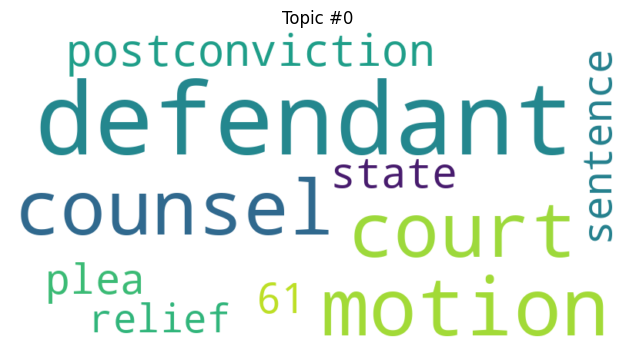

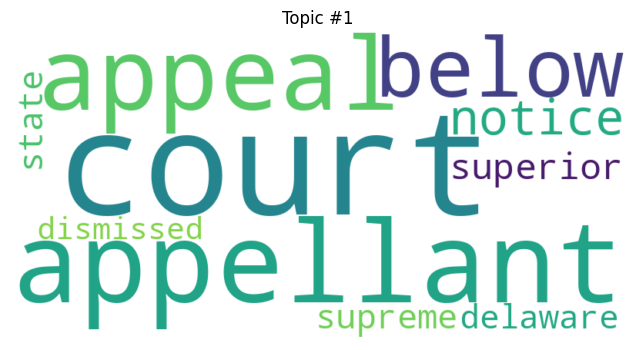

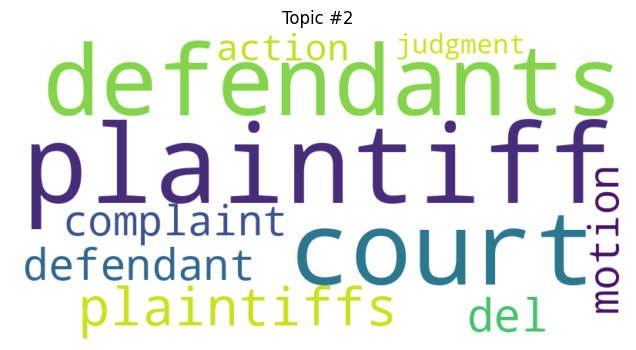

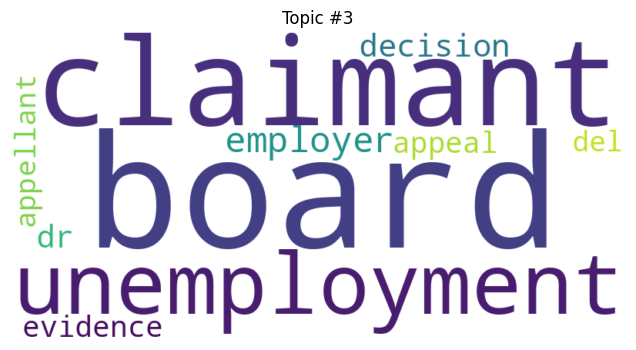

In [16]:
#Now we do something called unsupervised learning
#the model is trying to figure out how to divide the data into
n_topics = 4
#You can change this number
#Right now we are only thinking about criminal/civil cases
#but it's a good idea to try to see what the data is structured like
#maybe you can figure out other interesting classifications?
#Mess around and see what you find!

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert to dense DataFrame if needed later
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray())
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray())
nmf_model = NMF(n_components=n_topics)  # Set the number of topics
W = nmf_model.fit_transform(X_train_tfidf)
H = nmf_model.components_

n_top_words = 10
feature_names = tfidf_vectorizer.get_feature_names_out()

# Generate word clouds for each topic
for topic_idx, topic in enumerate(H):
    word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_top_words - 1:-1]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic #{topic_idx}")
    plt.axis('off')
    plt.show()

Naive Classifier Accuracy: 71.41%


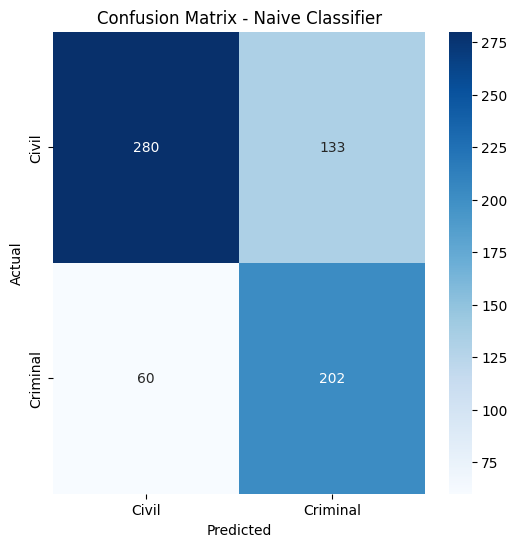

In [17]:
#Here we are trying to implement a very simple approach: each time a word appears from the list, it gets a point
top_terms_civil = ['court', 'del', 'plaintiff', 'appeal', 'motion', 'delaware', 'board', 'judgment', 'defendant', 'superior', 'state', 'defendants', 'appellant', '2d', 'family', 'plaintiffs', 'order', 'id', 'agreement', 'rule']
top_terms_criminal = ['court', 'state', 'motion', 'defendant', 'superior', 'appeal', 'delaware', 'del', 'counsel', 'trial', 'rule', 'sentence', 'postconviction', 'relief', 'notice', 'defendantâ', '61', 'appellant', 'plea', 'evidence']
def naive_classifier(text):
    count_civil = sum(term in text for term in top_terms_civil)
    count_criminal = sum(term in text for term in top_terms_criminal)
    return 'Civil' if count_civil > count_criminal else 'Criminal'
y_pred_naive = [naive_classifier(text) for text in X_test]

accuracy_naive = accuracy_score(y_test, y_pred_naive)
print(f'Naive Classifier Accuracy: {accuracy_naive * 100:.2f}%')

conf_matrix_naive = confusion_matrix(y_test, y_pred_naive)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_naive, annot=True, fmt='d', cmap='Blues', xticklabels=['Civil', 'Criminal'], yticklabels=['Civil', 'Criminal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Classifier')
plt.show()

Weighted Classifier Accuracy: 66.37%


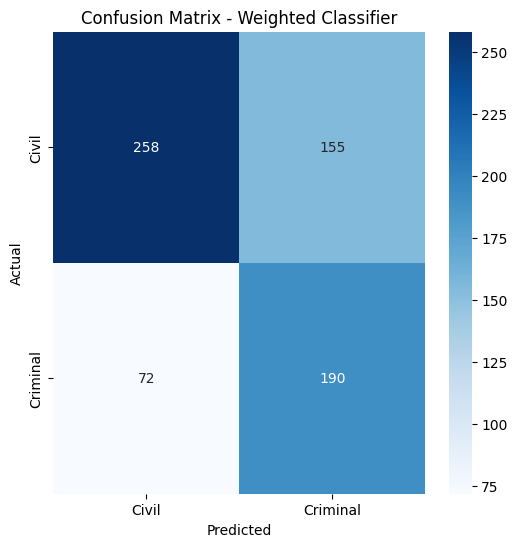

In [18]:
# A more sophisticated naive calssification
#For the first word in the list of civil, we give 21 points in civil, for the second, we give 20 in civil, and so on
#we do the same for criminal
#then we classify the document based on where it has the most points
def weighted_classifier(text):
    count_civil = sum((21 - idx) * (term in text) for idx, term in enumerate(top_terms_civil))
    count_criminal = sum((21 - idx) * (term in text) for idx, term in enumerate(top_terms_criminal))
    return 'Civil' if count_civil > count_criminal else 'Criminal'

y_pred_weighted = [weighted_classifier(text) for text in X_test]

accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f'Weighted Classifier Accuracy: {accuracy_weighted * 100:.2f}%')

conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_weighted, annot=True, fmt='d', cmap='Blues', xticklabels=['Civil', 'Criminal'], yticklabels=['Civil', 'Criminal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Weighted Classifier')
plt.show()

#It didn't work! That happens a lot

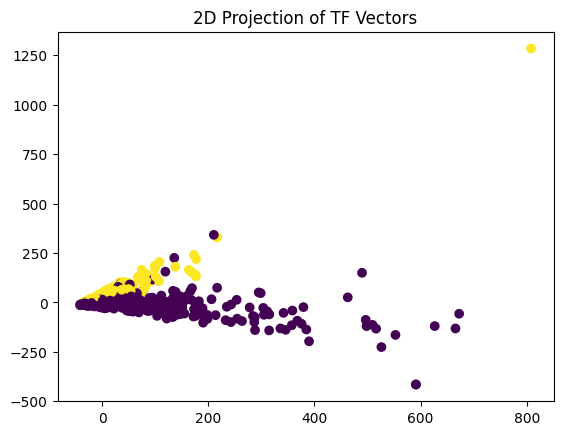

In [19]:
#we are now back to trying to classify civil/criminal. We are trying to encode words using a couple of different approaches.
#We then visualize them and see if any approach looks to us like it is better capable of separating topics

#Fun options: find the cmap option below and experiment with different color maps
'''
    'plasma'
    'inferno'
    'magma'
    'cividis'
    'spring'
    'cool'
    'Wistia'
    'twilight'
    'tab20c'
    'terrain'
'''
#Option 1: Term Frequency (TF)

tf_vectorizer = CountVectorizer()
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)  # Transform test data using the same vectorizer

# Apply PCA to the training data
pca_tf = PCA(n_components=2)
X_pca_tf_train = pca_tf.fit_transform(X_train_tf.toarray())
X_pca_tf_test = pca_tf.transform(X_test_tf.toarray())  # Apply transformation to test data
plt.scatter(X_pca_tf_train[:, 0], X_pca_tf_train[:, 1], c=y_train.astype('category').cat.codes, cmap='viridis')

plt.title("2D Projection of TF Vectors")
plt.show()

Text(0.5, 1.0, '2D Projection of TF-IDF')

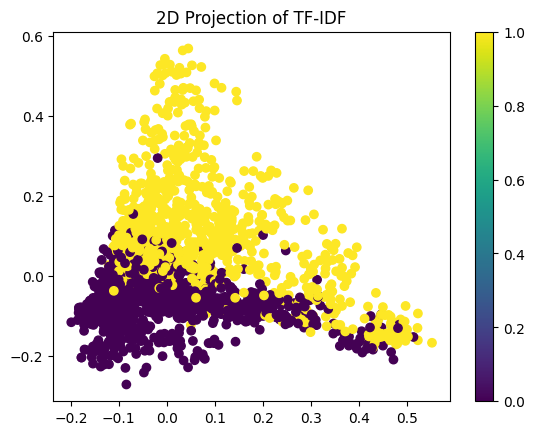

In [20]:
#Option 2: Term Frequency -- Inverse Document Frequency (TFIDF)
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert to dense DataFrame
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray())
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray())

# Apply PCA for 2D projection
pca = PCA(n_components=2)
X_pca_tfidf = pca.fit_transform(X_train_tfidf_df)

# Plot with Matplotlib
plt.scatter(X_pca_tfidf[:, 0], X_pca_tfidf[:, 1], c=y_train.astype('category').cat.codes, cmap='viridis')
plt.colorbar()
plt.title("2D Projection of TF-IDF")

Starting Fast Text Embeddings
--2023-08-25 16:14:12--  https://github.com/yonathanarbel/AI-LAW/raw/main/Class_2_Civil_v_Criminal_and_Federalist_Papers/fasttext_embeddings.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yonathanarbel/AI-LAW/main/Class_2_Civil_v_Criminal_and_Federalist_Papers/fasttext_embeddings.npy [following]
--2023-08-25 16:14:12--  https://raw.githubusercontent.com/yonathanarbel/AI-LAW/main/Class_2_Civil_v_Criminal_and_Federalist_Papers/fasttext_embeddings.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2159328 (2.1M) [application/octet-stream]
Saving to: ‘fasttext_emb

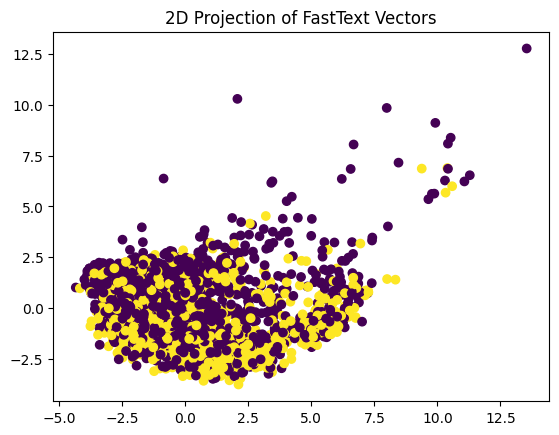

In [24]:
print("Starting Fast Text Embeddings")
#It takes a long time to actually make them, so we will download ones we prepared in advance:
!wget https://github.com/yonathanarbel/AI-LAW/raw/main/Class_2_Civil_v_Criminal_and_Federalist_Papers/fasttext_embeddings.npy
embeddings_file_path_fasttext = "/content/fasttext_embeddings.npy"
# Load the downloaded embeddings
X_train_fasttext = np.load(embeddings_file_path_fasttext, allow_pickle=True)
print("Finished loading FastText embeddings.")

# Apply PCA
print("Applying PCA...")
pca_fasttext = PCA(n_components=2)
X_pca_fasttext = pca_fasttext.fit_transform(X_train_fasttext)

# Removing the last row from X_pca_fasttext
X_pca_fasttext = X_pca_fasttext[:-1, :]

# Printing the new shape to confirm
print("New shape of X_pca_fasttext:", X_pca_fasttext.shape)

plt.scatter(X_pca_fasttext[:, 0], X_pca_fasttext[:, 1], c=y_train.astype('category').cat.codes, cmap='viridis')
plt.title("2D Projection of FastText Vectors")
plt.show()


Starting Doc2Vec Embeddings
--2023-08-25 16:15:59--  https://github.com/yonathanarbel/AI-LAW/raw/main/Class_2_Civil_v_Criminal_and_Federalist_Papers/X_train_doc2vec.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yonathanarbel/AI-LAW/main/Class_2_Civil_v_Criminal_and_Federalist_Papers/X_train_doc2vec.npy [following]
--2023-08-25 16:15:59--  https://raw.githubusercontent.com/yonathanarbel/AI-LAW/main/Class_2_Civil_v_Criminal_and_Federalist_Papers/X_train_doc2vec.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1079328 (1.0M) [application/octet-stream]
Saving to: ‘X_train_doc2vec.npy’

X_tr

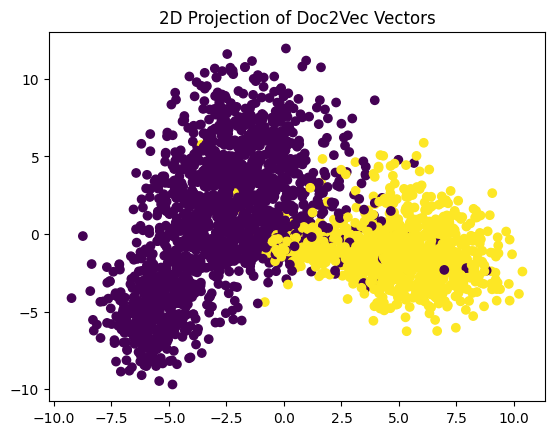

In [26]:
#The fasttext embeddings doesn't work very well..
#Let's try a different system. This one looks at the entire document (rather than individual words)
print("Starting Doc2Vec Embeddings")
# Download files
!wget -O "X_train_doc2vec.npy" "https://github.com/yonathanarbel/AI-LAW/raw/main/Class_2_Civil_v_Criminal_and_Federalist_Papers/X_train_doc2vec.npy"
!wget -O "X_test_doc2vec.npy" "https://github.com/yonathanarbel/AI-LAW/raw/main/Class_2_Civil_v_Criminal_and_Federalist_Papers/X_test_doc2vec.npy"


# Load arrays
X_train_doc2vec = np.load('X_train_doc2vec.npy')
X_test_doc2vec = np.load('X_test_doc2vec.npy')

print("Starting Doc2Vec Embeddings")

# Combine training and test data if you want to fit the model on the entire data
combined_doc2vec = np.concatenate((X_train_doc2vec, X_test_doc2vec))

# Apply PCA to the combined embeddings
print("Applying PCA...")
pca_doc2vec = PCA(n_components=2)
X_pca_doc2vec = pca_doc2vec.fit_transform(combined_doc2vec)

# If you need to separate the PCA results for training and test data
X_pca_train_doc2vec = X_pca_doc2vec[:len(X_train_doc2vec)]
X_pca_test_doc2vec = X_pca_doc2vec[len(X_train_doc2vec):]

# Plotting the 2D projection
plt.scatter(X_pca_train_doc2vec[:, 0], X_pca_train_doc2vec[:, 1], c=y_train.astype('category').cat.codes, cmap='viridis')
plt.title("2D Projection of Doc2Vec Vectors")
plt.show()

In [27]:
#OK, that's a beauty!
#We need to clear up some memory, feel free to ignore this part
# Delete unnecessary dataframes
#del X_test_tf, X_pca_tf_train, X_pca_tf_test, #clf_tf_pca, pca_tf, group
if 'exit' in locals():
    del exit
gc.collect()


21328

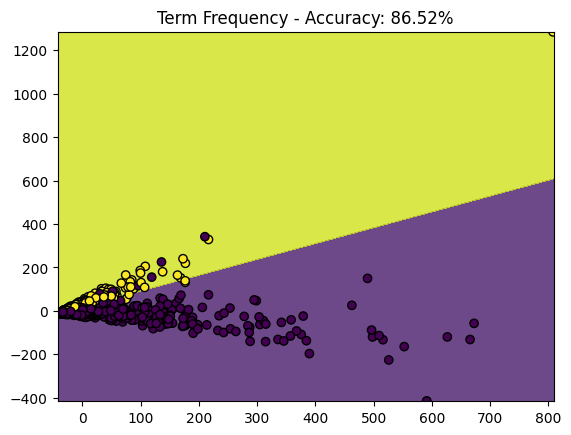

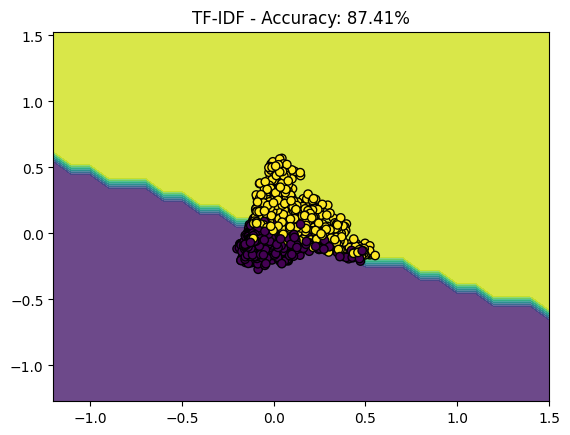

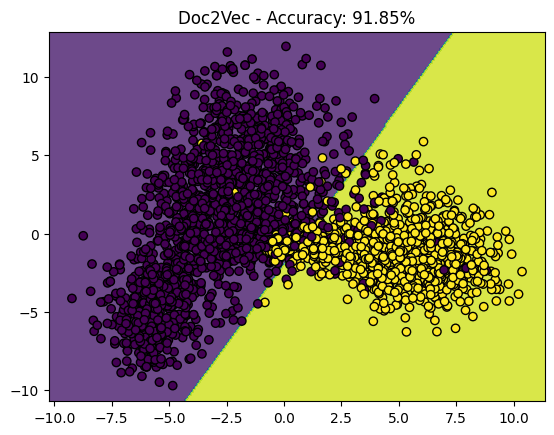

In [28]:
def plot_decision_boundary(clf, X_train, X_test, y_train, y_test, title):
    # Calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Define meshgrid
    h = .1
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Encode the labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_train)
    Z_encoded = label_encoder.transform(Z)

    Z_encoded = Z_encoded.reshape(xx.shape)
    plt.contourf(xx, yy, Z_encoded, cmap='viridis', alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_encoded, cmap='viridis', edgecolors='k')
    plt.title(f'{title} - Accuracy: {accuracy * 100:.2f}%')
    plt.show()

# Transform the TF data using PCA
pca_tf = PCA(n_components=2)
X_pca_tf_train = pca_tf.fit_transform(X_train_tf.toarray())
X_pca_tf_test = pca_tf.transform(X_test_tf.toarray())

# Fit the Logistic Regression model on the PCA-transformed data
clf_tf_pca = LogisticRegression()
clf_tf_pca.fit(X_pca_tf_train, y_train)

# Plot the decision boundary
plot_decision_boundary(clf_tf_pca, X_pca_tf_train, X_pca_tf_test, y_train, y_test, "Term Frequency")
plt.close()
# Delete objects no longer needed
del X_train_tf, X_test_tf, X_pca_tf_train, X_pca_tf_test, clf_tf_pca
gc.collect()

# Transform the TF-IDF data using PCA
pca_tfidf = PCA(n_components=2)
X_pca_tfidf_train = pca_tfidf.fit_transform(X_train_tfidf_df)
X_pca_tfidf_test = pca_tfidf.transform(X_test_tfidf_df)

# Fit the Logistic Regression model on the PCA-transformed data
clf_tfidf_pca = LogisticRegression()
clf_tfidf_pca.fit(X_pca_tfidf_train, y_train)

# Plot the decision boundary
plot_decision_boundary(clf_tfidf_pca, X_pca_tfidf_train, X_pca_tfidf_test, y_train, y_test, "TF-IDF")
plt.close()
gc.collect()
# Fit the Logistic Regression model on the PCA-transformed Doc2Vec data
clf_doc2vec_pca = LogisticRegression()
clf_doc2vec_pca.fit(X_pca_train_doc2vec, y_train)

# Plot the decision boundary for Doc2Vec
plot_decision_boundary(clf_doc2vec_pca, X_pca_train_doc2vec, X_pca_test_doc2vec, y_train, y_test, "Doc2Vec")


In [9]:
# A bonus project!

#Who wrote the missing federalist paper?
#background: https://github.com/ParInsights/Who-Wrote-It-Machine-Learning-and-the-Federalist-Papers
#Data: https://programminghistorian.org/assets/introduction-to-stylometry-with-python/stylometry-federalist.zip

#Boring imports
from zipfile import ZipFile
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.manifold import TSNE
from scipy.sparse import vstack
import numpy as np
import matplotlib.pyplot as plt
#Downloading and processing data. Nothing much to see here

!wget https://github.com/yonathanarbel/AI-LAW/raw/main/Class_2_Civil_v_Criminal_and_Federalist_Papers/stylometry-federalist.zip

zip_path = 'stylometry-federalist.zip'
extract_path = 'federalist_papers'

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

data_path = os.path.join(extract_path, 'data')

#Here's the mystery: The remaining 11 essays, however, are authored by “Hamilton or Madison”
'''
The Federalist Papers were a series of eighty-five essays urging the citizens of New York to ratify the new United States Constitution. Written by Alexander Hamilton, James Madison, and John Jay, the essays originally appeared anonymously in New York newspapers in 1787 and 1788 under the pen name "Publius." A bound edition of the essays was first published in 1788, but it was not until the 1818 edition published by the printer Jacob Gideon that the authors of each essay were identified by name. The Federalist Papers are considered one of the most important sources for interpreting and understanding the original intent of the Constitution.
2. About the disputed authorship

The original essays can be downloaded from the Library of Congress. http://thomas.loc.gov/home/histdox/fedpapers.html

In the author column, you will find 74 essays with identified authors: 51 essays written by Hamilton, 15 by Madison, 3 by Hamilton and Madison, 5 by Jay. The remaining 11 essays, however, is authored by “Hamilton or Madison”. These are the famous essays with disputed authorship. Hamilton wrote to claim the authorship before he was killed in a duel. Later Madison also claimed authorship. Historians were trying to find out which one was the real author.
'''

--2023-08-25 17:09:19--  https://github.com/yonathanarbel/AI-LAW/raw/main/Class_2_Civil_v_Criminal_and_Federalist_Papers/stylometry-federalist.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yonathanarbel/AI-LAW/main/Class_2_Civil_v_Criminal_and_Federalist_Papers/stylometry-federalist.zip [following]
--2023-08-25 17:09:19--  https://raw.githubusercontent.com/yonathanarbel/AI-LAW/main/Class_2_Civil_v_Criminal_and_Federalist_Papers/stylometry-federalist.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 881447 (861K) [application/zip]
Saving to: ‘stylometry-federalist.zip.11’

stylometry-fede

'\nThe Federalist Papers were a series of eighty-five essays urging the citizens of New York to ratify the new United States Constitution. Written by Alexander Hamilton, James Madison, and John Jay, the essays originally appeared anonymously in New York newspapers in 1787 and 1788 under the pen name "Publius." A bound edition of the essays was first published in 1788, but it was not until the 1818 edition published by the printer Jacob Gideon that the authors of each essay were identified by name. The Federalist Papers are considered one of the most important sources for interpreting and understanding the original intent of the Constitution.\n2. About the disputed authorship\n\nThe original essays can be downloaded from the Library of Congress. http://thomas.loc.gov/home/histdox/fedpapers.html\n\nIn the author column, you will find 74 essays with identified authors: 51 essays written by Hamilton, 15 by Madison, 3 by Hamilton and Madison, 5 by Jay. The remaining 11 essays, however, is a

In [2]:
# Dictionary defining the organization of the papers
papers = {
    'Madison': [10, 14, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
    'Hamilton': [1, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 21, 22, 23, 24,
                 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 59, 60,
                 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
                 78, 79, 80, 81, 82, 83, 84, 85],
    'Jay': [2, 3, 4, 5],
    'Shared': [18, 19, 20],
    'Disputed': [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63],
    'TestCase': [64]
}

# Function to read files into a string
def read_files_into_string(filenames):
    strings = []
    for filename in filenames:
        with open(f'{data_path}/federalist_{filename}.txt', 'r') as f:
            strings.append(f.read())
    return '\n'.join(strings)

# Organize the papers by author
federalist_by_author = {}
for author, files in papers.items():
    federalist_by_author[author] = read_files_into_string(files)

# Organize data by paper
data_per_paper = []
for author, text in federalist_by_author.items():
    author_ID = 'UNKNOWN' if author in ['Disputed', 'TestCase'] else author
    for paper_text in text.split('\n\n'):
        data_per_paper.append((author_ID, paper_text))

df_per_paper = pd.DataFrame(data_per_paper, columns=['author_ID', 'text'])

# Apply TF-IDF transformation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix_per_paper = tfidf_vectorizer.fit_transform(df_per_paper['text'])

# Apply PCA
pca = PCA(n_components=2)
reduced_data_per_paper = pca.fit_transform(tfidf_matrix_per_paper.toarray())




In [3]:
# Function to read files into a string
def read_files_into_string(filenames):
    strings = []
    for filename in filenames:
        with open(f'{data_path}/federalist_{filename}.txt', 'r') as f:
            strings.append(f.read())
    return '\n'.join(strings)

# Separate known and unknown authors
known_papers = {key: value for key, value in papers.items() if key not in ['Disputed', 'TestCase']}
unknown_papers = {key: value for key, value in papers.items() if key in ['Disputed', 'TestCase']}

# Read known authors' papers
known_data = []
for author, files in known_papers.items():
    known_data.append((author, read_files_into_string(files)))

df_known = pd.DataFrame(known_data, columns=['author_ID', 'text'])

# Read known authors' papers by individual paper
known_data = []
for author, files in known_papers.items():
    for file in files:
        known_data.append((author, read_files_into_string([file])))

df_known = pd.DataFrame(known_data, columns=['author_ID', 'text'])


tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix_known = tfidf_vectorizer.fit_transform(df_known['text'])



In [4]:
# Number of clusters equals the number of known authors
kmeans = KMeans(n_clusters=len(known_papers))
clusters_known = kmeans.fit_predict(tfidf_matrix_known)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
# Determine an appropriate perplexity value for known authors
perplexity_known = min(30, tfidf_matrix_known.shape[0] - 1)

tsne_known = TSNE(n_components=2, perplexity=perplexity_known, n_iter=300)
tsne_projection_known = tsne_known.fit_transform(tfidf_matrix_known.toarray())


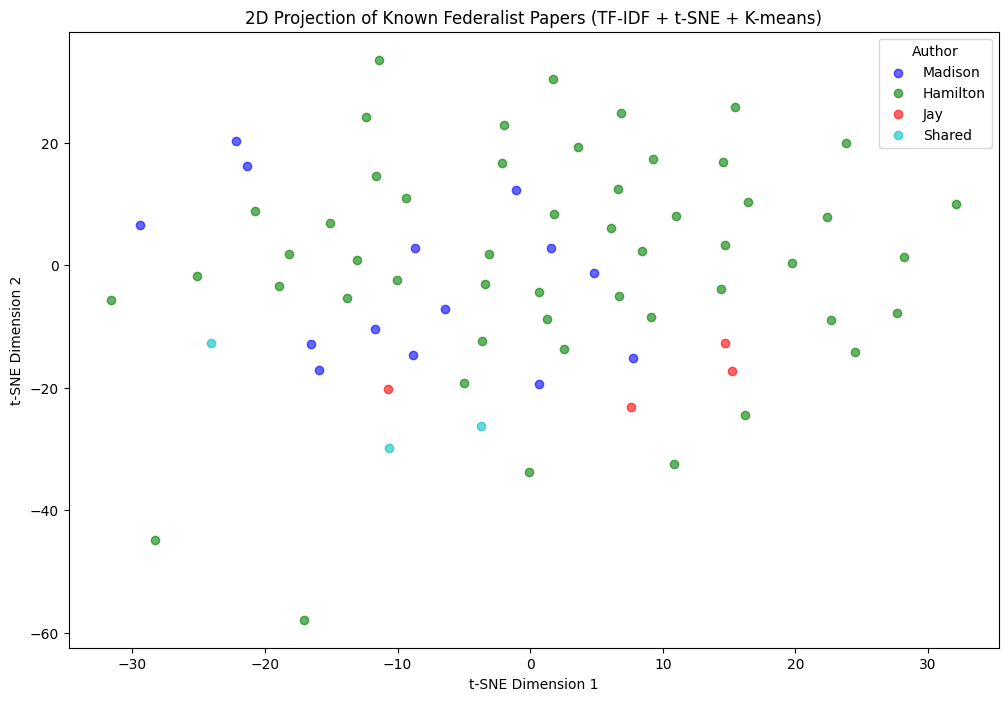

In [8]:
plt.figure(figsize=(12, 8))

# Define colors for known authors
colors = ['b', 'g', 'r', 'c']
authors = list(known_papers.keys())

# Plot known authors
for i, author in enumerate(authors):
    author_points = tsne_projection_known[df_known['author_ID'] == author]
    plt.scatter(author_points[:, 0], author_points[:, 1], label=author, alpha=0.6, c=colors[i])

plt.legend(title='Author')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('2D Projection of Known Federalist Papers (TF-IDF + t-SNE + K-means)')
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Distance from Madison Centroid to Unknown Centroid: 1.0745407342910767
Distance from Hamilton Centroid to Unknown Centroid: 1.361877202987671
Distance from Jay Centroid to Unknown Centroid: 3.94191837310791
Distance from Shared Centroid to Unknown Centroid: nan


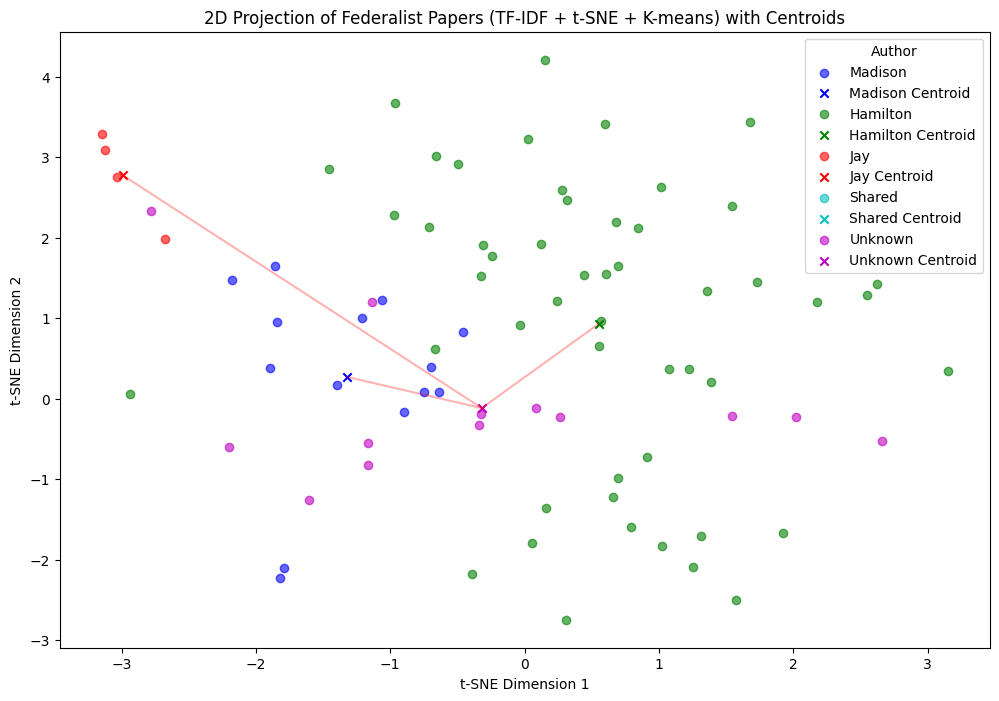

In [10]:


# Separate known and unknown authors
known_papers = {key: value for key, value in papers.items() if key not in ['Disputed', 'TestCase', 'Shared']}
unknown_papers = {key: value for key, value in papers.items() if key in ['Disputed', 'TestCase']}

# Read known authors' papers by individual paper
known_data = []
for author, files in known_papers.items():
    for file in files:
        known_data.append((author, read_files_into_string([file])))

df_known = pd.DataFrame(known_data, columns=['author_ID', 'text'])
tfidf_matrix_known = tfidf_vectorizer.transform(df_known['text'])

# Read unknown authors' papers by individual paper
unknown_data = []
for author, files in unknown_papers.items():
    for file in files:
        unknown_data.append((author, read_files_into_string([file])))

df_unknown = pd.DataFrame(unknown_data, columns=['author_ID', 'text'])
tfidf_matrix_unknown = tfidf_vectorizer.transform(df_unknown['text'])

# Combine known and unknown TF-IDF matrices
tfidf_matrix_combined = vstack([tfidf_matrix_known, tfidf_matrix_unknown])

# Define and fit t-SNE model to the combined matrix
tsne_model = TSNE(n_components=2, random_state=0)
tsne_projection_combined = tsne_model.fit_transform(tfidf_matrix_combined.toarray())

# Separate the projections of the known and unknown papers
tsne_projection_known = tsne_projection_combined[:len(df_known)]
tsne_projection_unknown = tsne_projection_combined[len(df_known):]

plt.figure(figsize=(12, 8))

# Plot known authors
for i, author in enumerate(authors):
    author_points = tsne_projection_known[df_known['author_ID'] == author]
    plt.scatter(author_points[:, 0], author_points[:, 1], label=author, alpha=0.6, c=colors[i])

    # Calculate and plot centroid for this author
    author_centroid = np.mean(author_points, axis=0)
    plt.scatter(author_centroid[0], author_centroid[1], label=f'{author} Centroid', alpha=1, c=colors[i], marker='x')

# Plot unknown authors
plt.scatter(tsne_projection_unknown[:, 0], tsne_projection_unknown[:, 1], label='Unknown', alpha=0.6, c='m')

# Calculate and plot the centroid of unknown papers
unknown_centroid = np.mean(tsne_projection_unknown, axis=0)
plt.scatter(unknown_centroid[0], unknown_centroid[1], label='Unknown Centroid', alpha=1, c='m', marker='x')

# Measure and report distances
for i, author in enumerate(authors):
    author_centroid = np.mean(tsne_projection_known[df_known['author_ID'] == author], axis=0)
    distance = np.linalg.norm(author_centroid - unknown_centroid)
    print(f'Distance from {author} Centroid to Unknown Centroid: {distance}')

    # Draw a line between the unknown centroid and this author's centroid
    plt.plot([author_centroid[0], unknown_centroid[0]], [author_centroid[1], unknown_centroid[1]], 'r-', alpha=0.3)

plt.legend(title='Author')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('2D Projection of Federalist Papers (TF-IDF + t-SNE + K-means) with Centroids')
plt.show()